# Meta learning and baseline comparison

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom classes
import sys
sys.path.insert(0,'..')
from meta_learning import evaluator, MetaEvaluator

## Macros

In [2]:
META_LABEL_METRIC = "kappa"
META_MODEL = "LGBMRegressor"
BASE_MODEL = "RandomForestClassifier"
DATASET = "electricity"
FILENAME = f"metabases/metamodel: {META_MODEL} - basemodel: {BASE_MODEL} - metric: {META_LABEL_METRIC} - dataset: {DATASET}.csv"
FILENAME

'metabases/metamodel: LGBMRegressor - basemodel: RandomForestClassifier - metric: kappa - dataset: electricity.csv'

In [3]:
META_LEARNING_COL = "meta_learning"
BASELINE_COL = "baseline"
TARGET_COL = "target"

## Read data

In [4]:
df = pd.read_csv(FILENAME).dropna()
df = df.rename(columns={"predicted": META_LEARNING_COL, f"last_{META_LABEL_METRIC}": BASELINE_COL, META_LABEL_METRIC: TARGET_COL})
df = df[[TARGET_COL, META_LEARNING_COL, BASELINE_COL]]
df.head()

,target,meta_learning,baseline
344,0.085219,0.114907,0.318182
345,0.095514,0.200532,0.240331
346,0.203258,0.262605,0.321429
355,0.757282,0.669651,0.852420
356,0.839422,0.654645,0.864376


In [5]:
meta_eval = MetaEvaluator(
    baseline_col = "baseline",
    mtl_col = "meta_learning",
    target_col = "target",
    eta = 50,
    step = 5
)
meta_eval.fit(df)

Cumulative gain - Mtl/ideal = 0.7039569241415862
Cumulative gain definition: mse(baseline) - mse(metalearning)


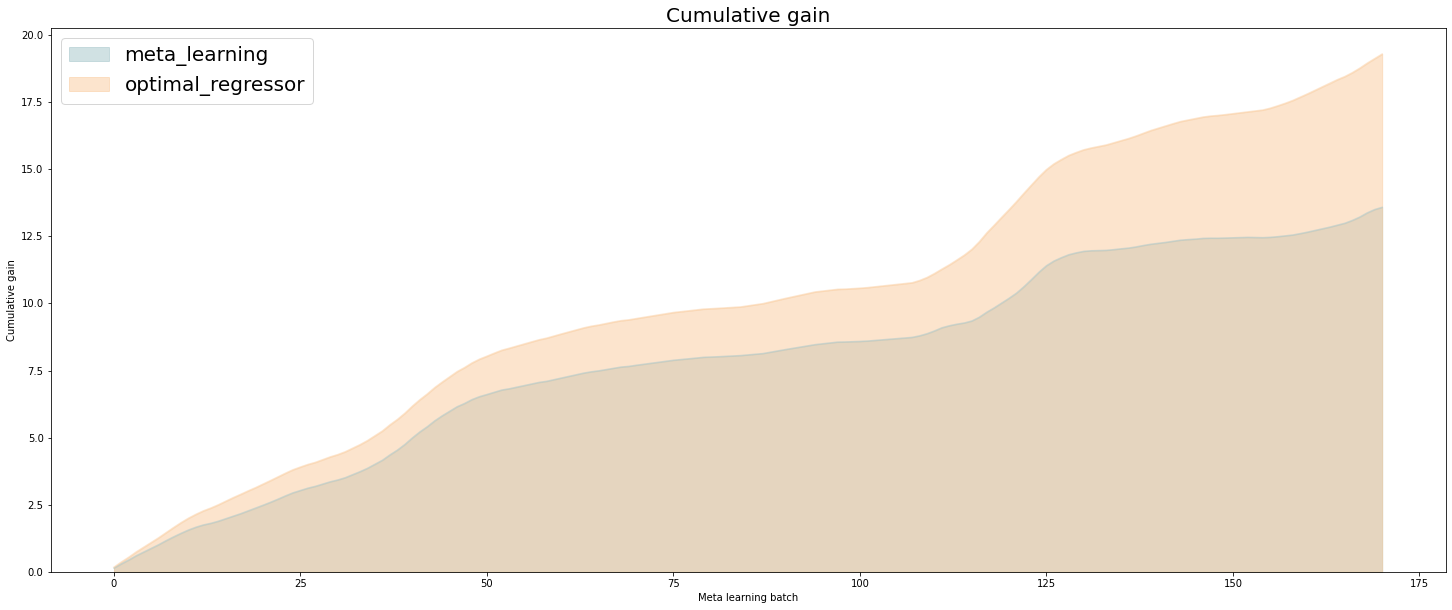

In [6]:
meta_eval.plot_cumulative_gain()

In [7]:
# meta_eval.plot_results()